In [190]:
import pandas as pd
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings("ignore")

In [191]:
df=pd.read_csv(r"C:\Users\rishi\ml_projects\UHI\New Notebooks\uhi_data_02.csv")
df = df.query("Month % 12 not in [6,7,8,9]")
df['Mean'] = df.iloc[:, 2:].mean(axis=1, skipna=True)
df['Median'] = df.iloc[:, 2:].median(axis=1, skipna=True)
#df.to_csv('res.csv')
df

,Year,Month,Delhi,Hyderabad,Mumbai,Bangalore,Kolkata,Chennai,Pune,Kanpur,Surat,Ahmedabad,Mean,Median
0,2014,1,NaN,0.111437,0.250893,0.109540,NaN,NaN,0.144095,NaN,0.119263,0.128639,0.143978,0.128639
1,2014,2,0.182794,0.187345,0.298120,0.116989,0.112989,0.242159,0.181388,0.128764,0.114179,0.109477,0.167420,0.167420
2,2014,3,NaN,0.129929,0.317555,0.115213,0.157636,0.268426,0.143651,0.154753,NaN,0.122956,0.176265,0.154753
3,2014,4,0.123702,0.128891,0.356786,0.152099,0.148951,0.253692,0.141852,NaN,0.129513,0.101268,0.170750,0.145401
4,2014,5,0.117699,0.125836,0.377684,0.153229,4.270323,NaN,NaN,0.138930,0.224623,0.086557,0.686860,0.153229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,2024,4,0.169897,0.412197,0.337461,0.122684,0.132497,0.334884,0.143977,NaN,0.160836,0.111438,0.213986,0.165366
124,2024,5,0.095926,NaN,0.437873,NaN,NaN,NaN,0.127935,0.173270,0.133569,0.092351,0.176821,0.133569
129,2024,10,0.117350,NaN,NaN,NaN,0.146509,NaN,NaN,0.114715,0.156453,0.103983,0.127802,0.122576
130,2024,11,0.095877,0.102935,0.264744,NaN,0.421900,NaN,NaN,0.077773,0.115270,0.090013,0.166930,0.109102


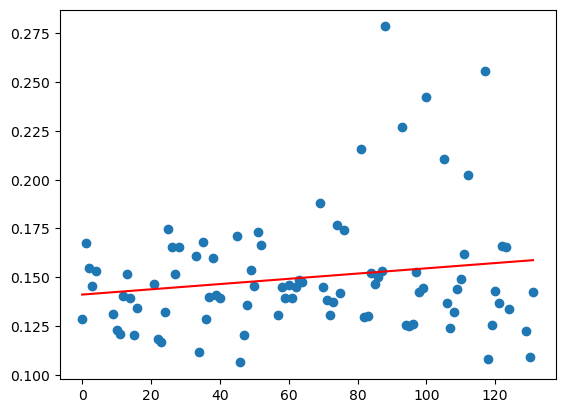

In [192]:
y=df['Median']
x=df.index
X=np.reshape(x, (-1,1))
fig,ax=plt.subplots()
ax.scatter(x,y)
model =LinearRegression()
model.fit(X,y)
model.coef_
line=model.coef_*x+ model.intercept_
ax.plot(x,line,c='r')


In [193]:
model.coef_

array([0.00013467])

In [194]:
x

Index([  0,   1,   2,   3,   4,   9,  10,  11,  12,  13,  14,  15,  16,  21,
        22,  23,  24,  25,  26,  27,  28,  33,  34,  35,  36,  37,  38,  39,
        40,  45,  46,  47,  48,  49,  50,  51,  52,  57,  58,  59,  60,  61,
        62,  63,  64,  69,  70,  71,  72,  73,  74,  75,  76,  81,  82,  83,
        84,  85,  86,  87,  88,  93,  94,  95,  96,  97,  98,  99, 100, 105,
       106, 107, 108, 109, 110, 111, 112, 117, 118, 119, 120, 121, 122, 123,
       124, 129, 130, 131],
      dtype='int64')

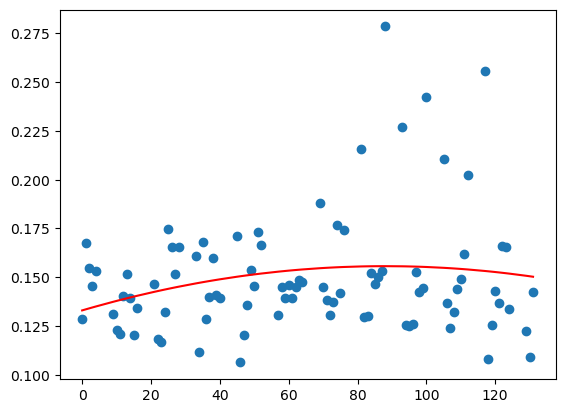

In [195]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
model.fit(poly_features,y)
fig,ax=plt.subplots()
ax.scatter(x,y)
model.coef_
#line=model.coef_[0]*x + model.coef_[1]*np.square(x)+ model.coef_[2]*np.power(x,3)+ model.intercept_
line=model.coef_[0]*x + model.coef_[1]*np.square(x)+ model.intercept_
ax.plot(x,line,c='r')

In [196]:
model.coef_

array([ 5.15678063e-04, -2.93048933e-06])

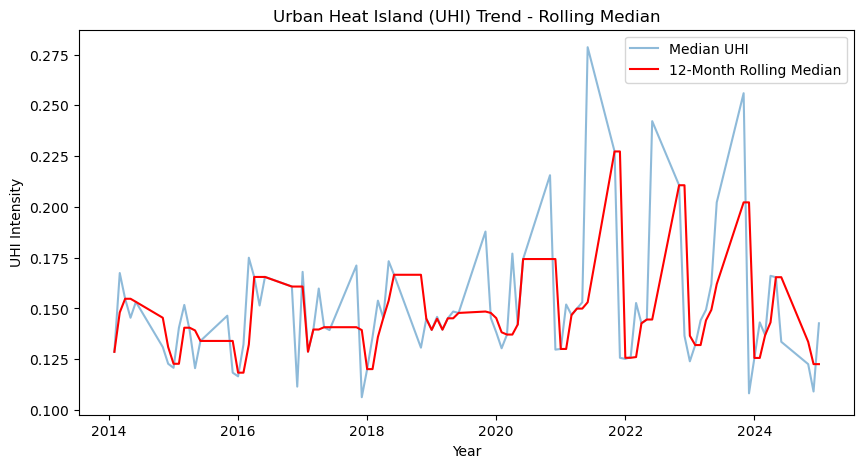

In [197]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `df` is your dataframe
df['Rolling_Median'] = df['Median'].rolling(window=3, min_periods=1).median()

# Plotting the rolling median
plt.figure(figsize=(10, 5))
plt.plot(df['Year'] + df['Month'] / 12, df['Median'], label='Median UHI', alpha=0.5)
plt.plot(df['Year'] + df['Month'] / 12, df['Rolling_Median'], label='12-Month Rolling Median', color='red')
plt.xlabel('Year')
plt.ylabel('UHI Intensity')
plt.title('Urban Heat Island (UHI) Trend - Rolling Median')
plt.legend()
plt.show()
